# Mental health in tech
![wall paper](image1.png)

Script to practice data cleanup, structuring, analysis with Mental health in tech dataset.

kaggle reference (https://www.kaggle.com/osmi/mental-health-in-tech-2016)




In [113]:
#load toolboxes
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [114]:
#Load data
df_train = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

![wall paper](image2.png)

In [115]:
# drop columns that are irrelevant for analysis
df_train = df_train[df_train['Is your employer primarily a tech company/organization?'] == 1]

df_train = df_train.drop(['Are you self-employed?', 'Is your primary role within your company related to tech/IT?', 'Is your employer primarily a tech company/organization?', 'Does your employer provide mental health benefits as part of healthcare coverage?','Do you know the options for mental health care available under your employer-provided coverage?','Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?','Does your employer offer resources to learn more about mental health concerns and options for seeking help?','Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'Do you feel that your employer takes mental health as seriously as physical health?',
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
       'Do you know local or online resources to seek help for a mental health disorder?',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
       'Do you believe your productivity is ever affected by a mental health issue?',
       'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
       'Do you have previous employers?',
       'Have your previous employers provided mental health benefits?',
       'Were you aware of the options for mental health care provided by your previous employers?',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
       'Did you feel that your previous employers took mental health as seriously as physical health?',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
       'Why or why not?',
       'Would you bring up a mental health issue with a potential employer in an interview?',
       'Why or why not?.1','If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
       'If yes, what condition(s) have you been diagnosed with?',
       'If maybe, what condition(s) do you believe you have?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
       'What US state or territory do you live in?',
       'What country do you work in?',
       'What US state or territory do you work in?',
       'Do you work remotely?','If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?','Would you have been willing to discuss a mental health issue with your previous co-workers?','Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' ], axis=1)

In [116]:
#####Rename and reorder columns 
#rename all remaining columns 
column_new = ['employee_no','disc_mh_employer', 'disc_ph_employer' , 'disc_cowork' ,'disc_supervisor','disc_friendsfam','fam_mh','mh_past','mh_current','diagnosed_prof','diagnosis','age','gender', 'country', 'workposition' ]
df_train.columns = column_new

#Gender //  recode values (male = 1, female = 2, other defined as Nan) (no offense, just try to create homogeneous groups (as much as possible) for further analysis)  
df_train['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Male.', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ','Cis Male', 'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df_train['gender'].replace(to_replace = ['Female', 'female',  'female ','Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df_train['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine', 'male 9:1 female, roughly','Male (trans, FtM)', 'I identify as female.', 'Transitioned, M2F',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid','Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer','Genderflux demi-girl', 'Transgender woman'], value = np.nan, inplace = True)

# Age  /// removed people with ages 3y, 15y, 99y and 323 y 
df_train['age'] = df_train['age'].astype(int)
a = df_train[(df_train['age'] >75) | (df_train['age']<17)].index.tolist
df_train = df_train.drop(a())
bins = [10, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_train['agerange'] = pd.cut(df_train['age'], bins, labels = labels,include_lowest = True)

# Diagnosis /// create column for each diagnosis and calculate most common diagnosis/// Not included:'Psychotic Disorder, 'I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.",Intimate Disorder, psychotic disorder
df_train['diagnosis'].unique()
l_diag = ('Anxiety Disorder', 'Stress Response Syndromes', 'Substance Use Disorder', 'Obsessive-Compulsive Disorder','Personality Disorder','Attention Deficit Hyperactivity Disorder',
             'Mood Disorder' , 'Addictive Disorder','Post-traumatic Stress Disorder', 'Pervasive Developmental Disorder' , 'Seasonal Affective Disorder' , 'PDD-NOS', 
             'Dissociative Disorder', 'Depression', 'Autism ', 'Traumatic Brain Injury' ,'Gender Dysphoria', 'Anxiety Disorder', 
             'Asperges','Sleeping Disorder', 'Eating Disorder')

a = 0
for x in l_diag:
  df_train[l_diag[a]] = df_train['diagnosis'].str.contains(l_diag[a])*1
  a = a+1 
    
diag_common = df_train.agg({ 'Anxiety Disorder':'sum','Stress Response Syndromes':'sum','Substance Use Disorder':'sum', 'Obsessive-Compulsive Disorder':'sum',
 'Personality Disorder':'sum', 'Attention Deficit Hyperactivity Disorder':'sum', 'Mood Disorder':'sum', 'Addictive Disorder':'sum',
 'Post-traumatic Stress Disorder':'sum','Pervasive Developmental Disorder':'sum', 'Seasonal Affective Disorder':'sum', 'PDD-NOS':'sum',
 'Dissociative Disorder':'sum','Depression':'sum','Autism ':'sum','Traumatic Brain Injury':'sum','Gender Dysphoria':'sum','Asperges':'sum',
 'Sleeping Disorder':'sum','Eating Disorder':'sum'}).sort_values()

# Recode categorical data to int
df_train.replace('Yes', 1, inplace = True) 
df_train.replace('No', 2, inplace = True) 
df_train.replace('Maybe', 3, inplace = True) 
df_train.replace("I don't know", 4, inplace = True) 
df_train.replace('More than 1000', '>1000', inplace = True)
df_train.replace('Not applicable to me (I do not have a mental illness)',value = np.nan, inplace = True) 
df_train.replace( 'Very open', 1, inplace = True) 
df_train.replace( 'Somewhat open', 1.5, inplace = True) 
df_train.replace( 'Neutral', 2, inplace = True) 
df_train.replace( 'Somewhat not open', 2.5, inplace = True) 
df_train.replace( 'Not open at all', 3, inplace = True) 

# Country // keep only countries with no. responses > 30 and rename  
df_train['country'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df_train['country'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df_train = df_train[df_train['country'].isin(['USA', 'UK', 'Canada','Germany', 'Netherlands','Australia'])]
df_train = df_train[df_train['country'].isin(['USA', 'UK', 'Canada','Germany', 'Netherlands','Australia'])]

# Work positoin // create columns for the different work positions
a = df_train.workposition
b =a.str.split(pat="|", expand=True)
b = b.melt()
b['value'].unique()

l_workposition = ['Back-end Developer', 'DevOps/SysAdmin', 'Dev Evangelist/Advocate','Front-end Developer', 'Supervisor/Team Lead', 'Designer', 'Other',
       'One-person shop', 'Executive Leadership', 'Support', 'HR','Sales']

a = 0
for x in l_workposition:
  df_train[l_workposition[a]] = df_train['workposition'].str.contains(l_workposition[a])*1
  a = a+1  


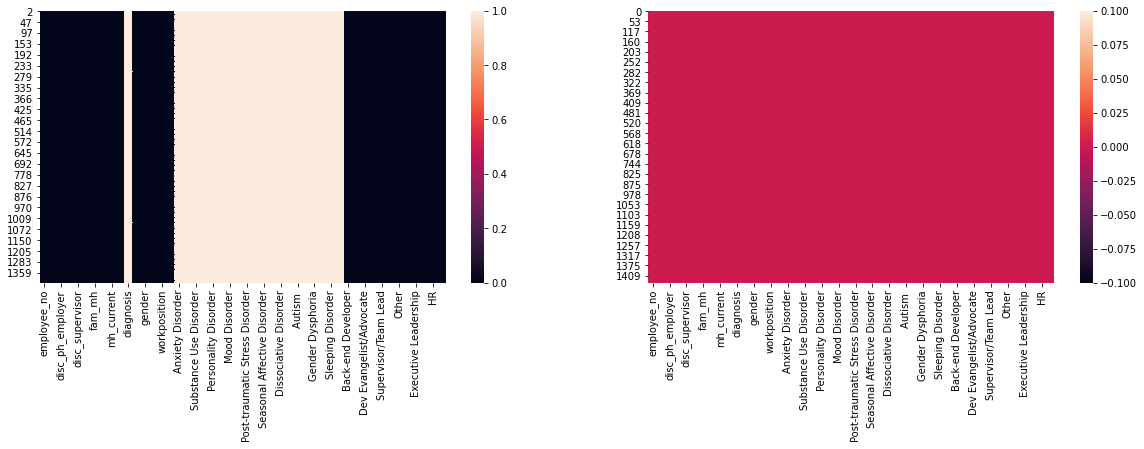

<Figure size 1152x288 with 0 Axes>

In [117]:
# Final cleanup of dataframe
# drop remaining columns that are irrelevant for analysis 
df_train.drop(['Stress Response Syndromes', 'Substance Use Disorder', 'Obsessive-Compulsive Disorder','Personality Disorder',
'Addictive Disorder','Pervasive Developmental Disorder' , 'Seasonal Affective Disorder' , 'PDD-NOS', 'Dissociative Disorder',  
'Autism ', 'Traumatic Brain Injury' ,'Gender Dysphoria','Asperges','Sleeping Disorder', 'Eating Disorder', 'diagnosis', 'workposition'], axis=1)

# remove nan/null values and check with heatmap
df_train = df_train[pd.notnull(df_train['gender'])]
df_train = df_train[pd.notnull(df_train['disc_friendsfam'])]
a = df_train[(df_train['diagnosed_prof'] == 1 & (df_train.diagnosis.isna()))].index.values.tolist()
df_train = df_train.drop(a)

# Missing values visualisation for subjects with and without professional diagnosis
profy = df_train[df_train['diagnosed_prof'] == 1]
profn = df_train[df_train['diagnosed_prof'] == 2]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)

sns.heatmap(data = profn.isna(), ax=ax1); # Questions about diagnosis are missing as expected. 324 subjects
sns.heatmap(data = profy.isna(), ax=ax2); # no nans. 374 subjects

![wall paper](image2.png)

In [118]:
# create lists for chart/graph labels and analysis
l_employee_no = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
l_disc = ['No', 'Yes', 'Maybe' ]
l_disc_friendfam = ['Not applicable to me (I do not have a mental illness)', 'Very open', 'Somewhat open', 'Neutral', 'Somewhat not open', 'Not open at all']
l_fam_mh = ['No', 'Yes', "I don't know"]
l_mh_currentpast = ['No', 'Yes', 'Maybe']
l_diag_prof = ['No','Yes']
l_diag_common = ['Anxiety Disorder','Attention Deficit Hyperactivity Disorder','Mood Disorder','Post-traumatic Stress Disorder', 'Depression']

In [119]:
df_train.head()

,employee_no,disc_mh_employer,disc_ph_employer,disc_cowork,disc_supervisor,disc_friendsfam,fam_mh,mh_past,mh_current,diagnosed_prof,...,Dev Evangelist/Advocate,Front-end Developer,Supervisor/Team Lead,Designer,Other,One-person shop,Executive Leadership,Support,HR,Sales
0,26-100,2,2,3,1,1.5,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,6-25,2,2,3,1,1.5,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,6-25,3,2,3,3,1.5,2,3,2,2,...,0,0,0,0,0,0,0,0,0,0
5,>1000,1,1,3,1,1.5,2,2,1,2,...,0,1,0,1,0,0,0,1,0,0
7,>1000,2,2,3,1,1.5,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


![wall paper](image2.png) 
# Visualization of possible differences between groups with and without mental health diagnosis by professional
* age distribution 
* gender distribution
* company size distribution
* comfort with revealing mental vs physical health problems
* disclosure of mental health problems to others

![wall paper](image2.png)

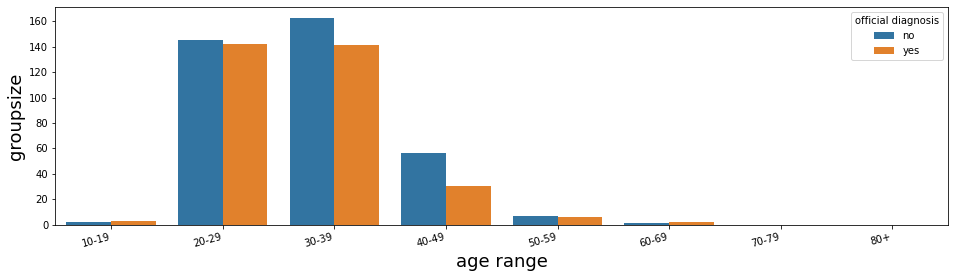

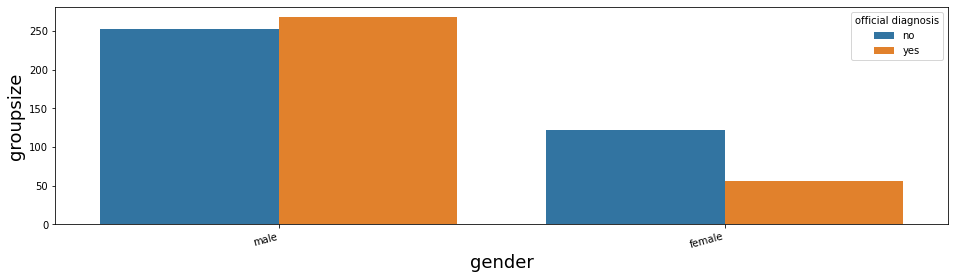

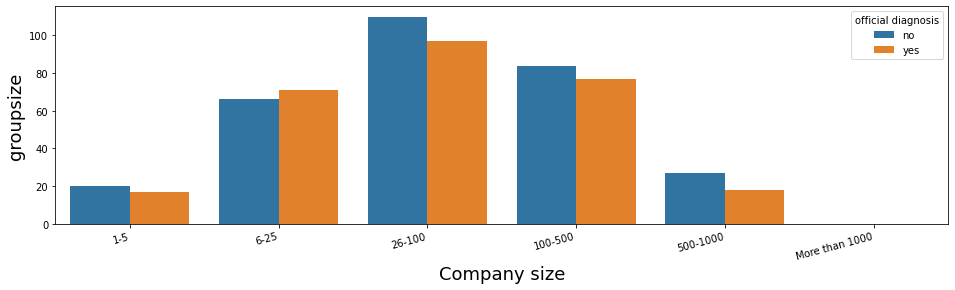

In [120]:
# No of respondents by age
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
ax = sns.countplot(x = df_train['agerange'], hue = df_train['diagnosed_prof'], order = labels)
#ax.set_title('Number of subjects with vs without diagnosis by age', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
ax.set_xlabel('age range', fontsize = 18)
ax.set_ylabel('groupsize', fontsize = 18)
ax.legend(['no', 'yes'], title='official diagnosis', loc = 1)

# No of respondents by gender
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
ax = sns.countplot(x = df_train['gender'], hue = df_train['diagnosed_prof'], order = [1,2])
#ax.set_title('Number of subjects with vs without diagnosis by gender', fontsize = 20)
ax.set_xticklabels(['male','female'], rotation=15, ha="right")
ax.set_xlabel('gender', fontsize = 18)
ax.set_ylabel('groupsize', fontsize = 18)
ax.legend(['no', 'yes'], title='official diagnosis', loc=1)

# No of respondents by company size
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
ax = sns.countplot(x = df_train['employee_no'], hue = df_train['diagnosed_prof'], order = l_employee_no)
#ax.set_title('Number of subjects with vs without diagnosis by company size', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
ax.set_xlabel('Company size', fontsize = 18)
ax.set_ylabel('groupsize', fontsize = 18)
ax.legend(['no', 'yes'], title='official diagnosis',loc=1)

Text(0.5, 1.0, 'Comfort discussing physical health%')

<Figure size 1152x360 with 0 Axes>

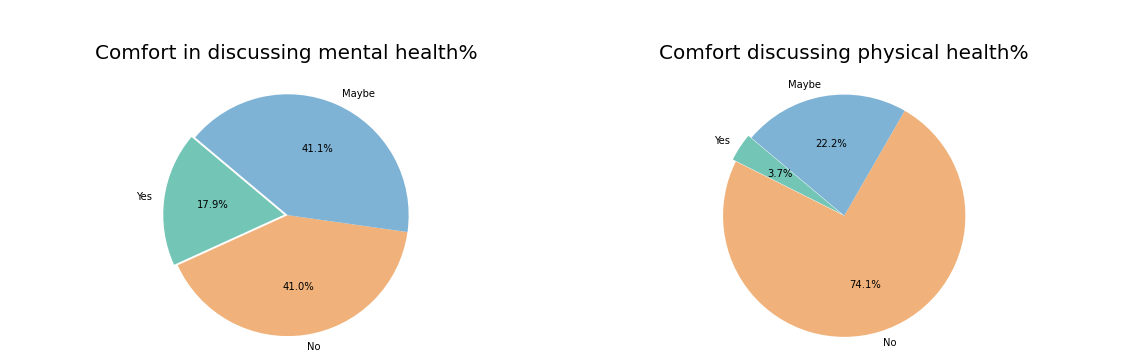

In [121]:
# is there a difference in disclosure about physical mental illness between both groups? (hue gender en hue country)
# Average response on disclosuer physical health 
plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle(' ', fontsize = 25, y=1.08)

# Pie Chart1
Yes = df_train[df_train['disc_mh_employer']== 1].count()['disc_mh_employer']
No = df_train[df_train['disc_mh_employer']== 2].count()['disc_mh_employer']
Maybe = df_train[df_train['disc_mh_employer']== 3].count()['disc_mh_employer']

labels = 'Yes', 'No', 'Maybe'
sizes = [Yes, No , Maybe]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Comfort in discussing mental health%', pad = 20, fontsize = 20)


# Pie Chart 2
Yes = df_train[df_train['disc_ph_employer']== 1].count()['disc_ph_employer']
No = df_train[df_train['disc_ph_employer']== 2].count()['disc_ph_employer']
Maybe = df_train[df_train['disc_ph_employer']== 3].count()['disc_ph_employer']

labels = 'Yes', 'No', 'Maybe'
sizes = [Yes, No , Maybe]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Comfort discussing physical health%', pad = 20, fontsize = 20)

<ipython-input-71-127cf94e4597>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(l_disc, rotation=15, ha="right")


<Figure size 1152x360 with 0 Axes>

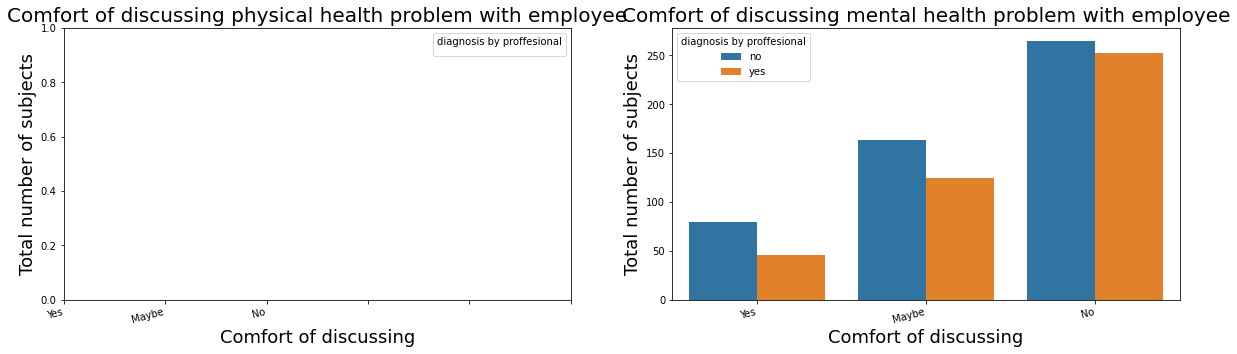

In [71]:
l_disc_v = [1, 3, 2]
l_disc = ['Yes', 'Maybe', 'No' ]

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
#plt.subplots_adjust(wspace = 0)

ax = sns.countplot(x = df_train['disc_ph_employer'], hue = df_train['diagnosed_prof'], order = l_disc_v)
ax1.set_title('Comfort of discussing physical health problem with employee', fontsize = 20)
ax1.set_xticklabels(l_disc, rotation=15, ha="right")
ax1.set_xlabel('Comfort of discussing', fontsize = 18)
ax1.set_ylabel('Total number of subjects', fontsize = 18)
ax1.legend(['no', 'yes'], title='diagnosis by proffesional')

ax = sns.countplot(x = df_train['disc_mh_employer'], hue = df_train['diagnosed_prof'], order = l_disc_v)
ax2.set_title('Comfort of discussing mental health problem with employee', fontsize = 20)
ax2.set_xticklabels(l_disc, rotation=15, ha="right")
ax2.set_xlabel('Comfort of discussing', fontsize = 18)
ax2.set_ylabel('Total number of subjects', fontsize = 18)
ax2.legend(['no', 'yes'], title='diagnosis by proffesional')

Text(0.5, 1.0, 'diag yes')

<Figure size 1152x360 with 0 Axes>

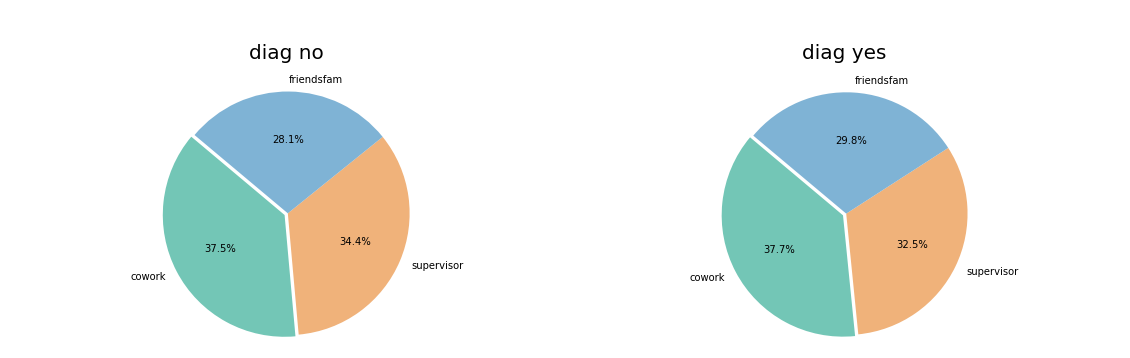

In [129]:
# how about disclosure on family vs friends vs work # make aggregate and calculate means. plotin barplot
plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle(' ', fontsize = 25, y=1.08)

# Pie Chart1
a = df_train[df_train['diagnosed_prof'] == 1][['disc_cowork' , 'disc_supervisor', 'disc_friendsfam']].mean()
b = df_train[df_train['diagnosed_prof'] == 2][['disc_cowork' , 'disc_supervisor', 'disc_friendsfam']].mean()

labels = 'cowork', 'supervisor', 'friendsfam'
mean_val1 = [ a[0], a[1] ,a[2]]
mean_val2 = [b[0], b[1] ,b[2]]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice
ax1.pie(mean_val1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('diag no', pad = 20, fontsize = 20)

# Pie Chart 2
ax2.pie(mean_val2, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('diag yes', pad = 20, fontsize = 20)

Text(0.5, 1.0, 'Depression')

<Figure size 1152x360 with 0 Axes>

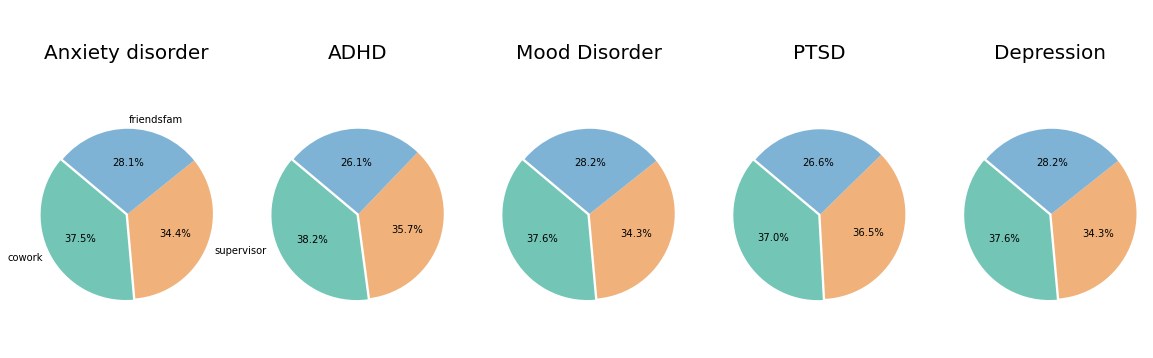

In [142]:
#for each diagnosis
plt.figure(figsize = (16,5))
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.2)
fig.suptitle(' ', fontsize = 25, y=1.08)


# Pie Chart1
a = df_train[df_train['Anxiety Disorder'] == 1][['disc_cowork' , 'disc_supervisor', 'disc_friendsfam']].mean()
b = df_train[df_train['Attention Deficit Hyperactivity Disorder'] == 1][['disc_cowork' , 'disc_supervisor', 'disc_friendsfam']].mean()
c = df_train[df_train['Mood Disorder'] == 1][['disc_cowork' , 'disc_supervisor', 'disc_friendsfam']].mean()
d = df_train[df_train['Post-traumatic Stress Disorder'] == 1][['disc_cowork' , 'disc_supervisor', 'disc_friendsfam']].mean()
e = df_train[df_train['Depression'] == 1][['disc_cowork' , 'disc_supervisor', 'disc_friendsfam']].mean()

labels = 'cowork', 'supervisor', 'friendsfam'
mean_val1 = [a[0], a[1] ,a[2]]
mean_val2 = [b[0], b[1] ,b[2]]
mean_val3 = [c[0], c[1] ,c[2]]
mean_val4 = [d[0], d[1] ,d[2]]
mean_val5 = [e[0], e[1] ,e[2]]

colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice
ax1.pie(mean_val1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Anxiety disorder', pad = 20, fontsize = 20)

# Pie Chart 2
ax2.pie(mean_val2, explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('ADHD', pad = 20, fontsize = 20)

# Pie Chart 3
ax3.pie(mean_val3, explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Mood Disorder', pad = 20, fontsize = 20)

# Pie Chart 4
ax4.pie(mean_val4, explode=explode,  colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax4.axis('equal')
ax4.set_title('PTSD', pad = 20, fontsize = 20)

# Pie Chart 5
ax5.pie(mean_val5, explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax5.axis('equal')
ax5.set_title('Depression', pad = 20, fontsize = 20)





![wall paper](image2.png) 
# Visualization of 
* 
* 
* 

![wall paper](image2.png)

In [169]:
# is there a difference in disclosure between both groups? (hue gender en hue country)
# make aggregate and calculate means. plotin barplot

plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
ax = sns.countplot(x = profn['disc_ph_employer'], hue = profn['diagnosed_prof'], order = l_disc_v)
ax.set_title('Comfort of discussing physical health problem with employee', fontsize = 20)
ax.set_xticklabels(l_disc, rotation=15, ha="right")
ax.set_xlabel('Comfort of discussing', fontsize = 18)
ax.set_ylabel('Total number of subjects', fontsize = 18)
ax.legend(['no', 'yes'], title='diagnosis by proffesional')

plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
ax = sns.countplot(x = profy['disc_mh_employer'], hue = profy['diagnosed_prof'], order = l_disc_v)
ax.set_title('Comfort of discussing mental health problem with employee', fontsize = 20)
ax.set_xticklabels(l_disc, rotation=15, ha="right")
ax.set_xlabel('Comfort of discussing', fontsize = 18)
ax.set_ylabel('Total number of subjects', fontsize = 18)
ax.legend(['no', 'yes'], title='diagnosis by proffesional')
# is there a difference in company size or workposition?
# is there a difference with disorders in the past?

a.head()

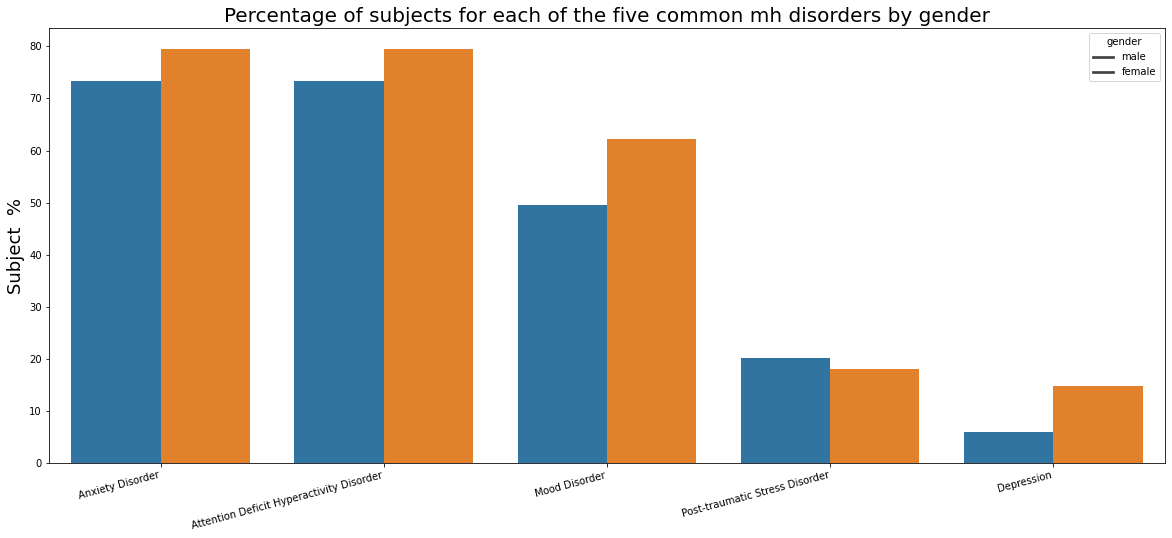

In [188]:
# within the diagnosis group, 
# is there a gender difference in diagnosis? 

# aggregate data and create a column with number of datapoints per subgroup
profy_diag_sum = profy.groupby(['gender'], as_index = False).agg({'Depression':'sum','Mood Disorder':'sum','Anxiety Disorder':'sum', 'Attention Deficit Hyperactivity Disorder':'sum','Post-traumatic Stress Disorder':'sum'})
profy_diag_sum['datapoint_no'] = profy.groupby(['gender'], as_index = False).agg({'age':'count'})['age']

# calculate percentage of subjects with certain diagnosis in each gender group and align horizontally
profy_diag_sum[l_diag_common] = a[l_diag_common] = profy_diag_sum[l_diag_common].div(profy_diag_sum['datapoint_no'].values,axis=0)*100
profy_diag_sum.drop(['datapoint_no'], axis=1, inplace = True)
profy_diag_sum_m = pd.melt(profy_diag_sum, id_vars =['gender'])

# Percentage of the 5 main disorders for each gender
plt.figure(figsize = (20,8))
fig.set_figheight(10)
fig.set_figwidth(20)
ax = sns.barplot(x = 'variable', y='value', data = profy_diag_sum_m, hue = 'gender')
ax.set_title('Percentage of subjects for each of the five common mh disorders by gender', fontsize = 20)
ax.set_xticklabels(l_diag_common, rotation=15, ha="right")
ax.set_xlabel('', fontsize = 18)
ax.set_ylabel('Subject  %', fontsize = 18)
ax.legend(['male', 'female'], title='gender')

,agerange,total number of datapoints
0,10-19,2
1,20-29,145
2,30-39,163
3,40-49,56
4,50-59,7
5,60-69,1
6,70-79,0
7,80+,0


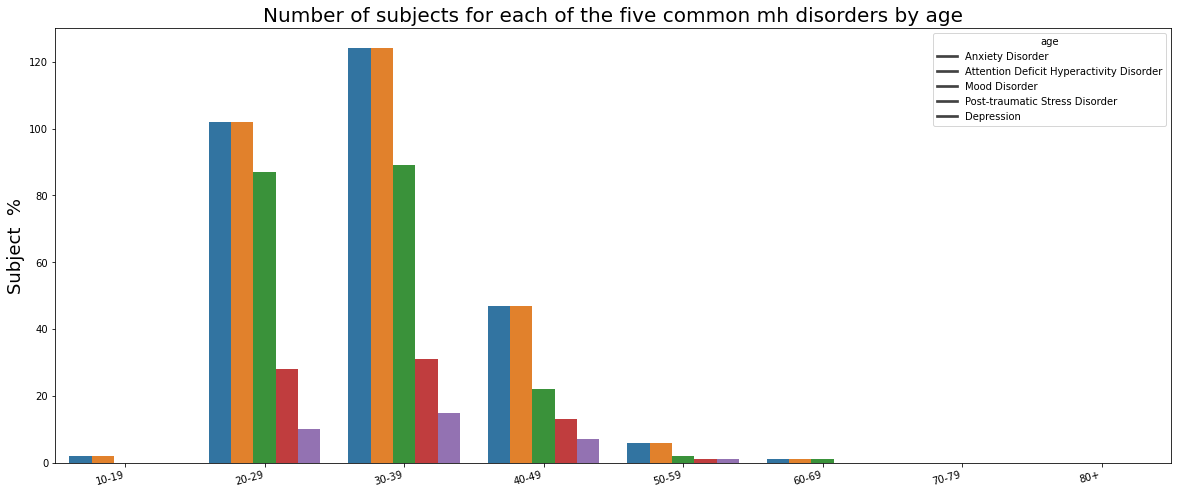

In [240]:
# is there an age difference in diagnosis? (hue age)
# aggregate data and create a column with number of datapoints per subgroup
profy_age_sum = profy.groupby(['agerange'], as_index = False).agg({'Depression':'sum','Mood Disorder':'sum','Anxiety Disorder':'sum', 'Attention Deficit Hyperactivity Disorder':'sum','Post-traumatic Stress Disorder':'sum'})
profy_age_sum_m = pd.melt(profy_age_sum, id_vars =['agerange'])

# Percentage of the 5 main disorders for each gender
plt.figure(figsize = (20,8))
fig.set_figheight(10)
fig.set_figwidth(20)
ax = sns.barplot(x = 'agerange', y='value', data = profy_age_sum_m, hue = 'variable')
ax.set_title('Number of subjects for each of the five common mh disorders by age', fontsize = 20)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.set_xlabel('', fontsize = 18)
ax.set_ylabel('Subject  %', fontsize = 18)
ax.legend(l_diag_common, title='age')

d = profy_age_sum
d['total number of datapoints'] = profy.groupby(['agerange'], as_index = False).agg({'age':'count'})['age']
d[['agerange' ,'total number of datapoints']]

In [ ]:
# is there a difference in disclosure between diagnosis? (hue diagnosis) (misschien ook current/past)
# is there a difference in disorders in the past? (how many before, now, both)
profy_gend_sum_m = pd.melt(profy_gend_sum, id_vars =['gender'])
 

#sns.dark_palette('#BB3316', reverse=True, as_cmap=True)
# color='#BB3316'https://htmlcolorcodes.com/


###Predictive
# is it possible to predict who has trouble informing the employer?
# is it possible to predict the diagnosis based on disclosure?

#### try to achieve at least a group size of 25